In [9]:

#%pip install optree
#%pip install keras
#The dataset has one csv file for each currency.
#Date : Date of observation
#Open : Opening price on the given day
#High : Highest price on the given day
#Low : Lowest price on the given day
#Close : Closing price on the given day
#Volume : Volume of transactions on the given day
#Market Cap : Market capitalization in USD
#Circulating Supply: The amount of coins that are circulating in the market and are in public hands.
#The Circulating Supply is not directly taken from coinmarketcap, but it is calculated using the formula,
#Circulating Supply = Market Cap / Closing price of the respective day
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from keras.layers import Dense, LSTM
#from keras.models import Sequential
import matplotlib.pyplot as plt
import math
df = pd.read_csv('coin_data.csv')

plt.style.use('fivethirtyeight')


In [14]:
bitcoin_df = df[df['Currency'] == 'bitcoin'].copy()

In [18]:
bitcoin_df.sort_values(by='Date', inplace=True)
#bitcoin_df = df[df['Currency'] == 'bitcoin'].copy()  # Make a copy to avoid the warning
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
# Convert 'Close' column to float
bitcoin_df.loc[:, 'Close'] = bitcoin_df['Close'].str.replace(',', '').astype(float)


AttributeError: Can only use .str accessor with string values!

In [19]:


data = bitcoin_df.filter(['Close'])

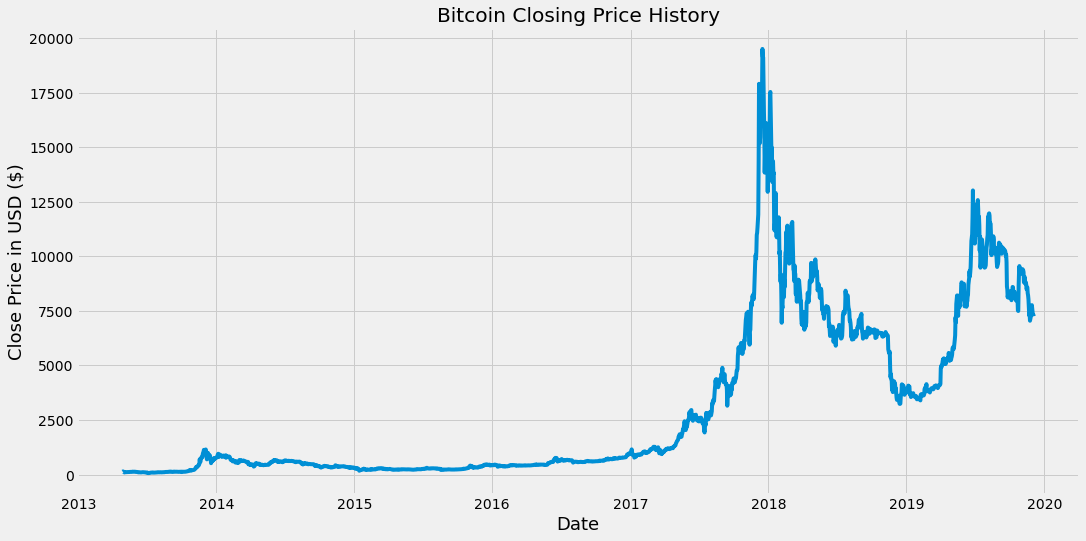

In [20]:
plt.figure(figsize=(16, 8))
plt.title('Bitcoin Closing Price History')
plt.plot(bitcoin_df['Date'], data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize=18)
plt.show()

In [21]:
#convert dataframe to numpy array
dataset = data.values
#retrive number of rows to train the model
training_data_length = math.ceil(len(dataset))* .8 #gives us 80% of the data

training_data_length 
training_data_length = int(1929.6000000000001)

In [ ]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
#holds data set thats scaled with values between 0-1 inclusive 
scaled_data = scaler.fit_transform(dataset)#computes min and max values
scaled_data

In [ ]:
#Create Training DataSet

train_data = scaled_data[0:training_data_length, :]
#split data into x_train and y_train data set

x_train = []
y_train = []


for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])# will index 60 values from position 0 to 59 
        y_train.append(train_data[i,0])#will contain 61st value at postion 60
        if i <= 61:
            print(x_train)
            print(y_train)
        
#This big array is the x training data set 
#small array is the y training data set


In [ ]:
#convert x_train and y_train to to numpy arrays to train LSTM Model

x_train,y_train = np.array(x_train),np.array(y_train)
#reshape data to make it 3D dimensional data set
#LSTM Model expects number of samples, timesteps, features
#samples = rows 1869 timestamps timesteps = 60 and we have 1 feature the closing price


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

In [ ]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequence=True, input_shape=(x_train.shape[1])))
model.add(LSTM(50, return_sequence=False))
model.add(Dense(25))
model.add(Dense(1))

In [2]:
#Compile model

#optimizer used to improve loss function
#loss function used to measure how well model did on training
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=1)#epochs iterations passed through a nueral network


NameError: name 'model' is not defined

In [4]:
#Create testing data set 
#Create a new array containing scaled values from 1869 to 2003
test_data = scaled_data[training_data_length - 60: , :]
#create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_length:,:]
for i in range(60,len[i-60:i, 0]):
    x_test.append(test_data[i-60:i,0])
    



NameError: name 'scaled_data' is not defined

In [5]:
x_test = np.array(x_test)

#Reshape
x_test = np.reshape(x_test[0], (x_test.shape[1], 1))


#timesteps?


NameError: name 'x_test' is not defined

In [6]:
# Get the models predicted Price Values
predictions = model.predict(x_test)

# Unscale the predicted values
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print(rmse)

NameError: name 'model' is not defined

In [7]:
#Get the RMSE it is a good measure of accurate predictions
rmse = np.sqrt(np.mean(predictions - y_test**2))
print(rmse)


NameError: name 'predictions' is not defined